# Weather Type Classification

Notebook ini bertujuan untuk membangun model *deep learning* yang dapat **mengklasifikasikan tipe cuaca** (seperti Cerah, Berawan, Hujan, dan Salju) secara akurat berdasarkan data sensor.

Permasalahan ini diangkat karena pentingnya prediksi cuaca yang akurat dan cepat, yang berdampak langsung pada berbagai sektor penting, seperti:
* **Transportasi dan Logistik**
* **Sektor Pertanian**
* **Industri Pariwisata**
* **Keselamatan dan Perencanaan Acara**

# Import Library

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Pada bagian ini, kita mengimpor semua *library* yang diperlukan. Untuk manipulasi dan visualisasi data, digunakan **`pandas`**, **`numpy`**, **`matplotlib`**, dan **`seaborn`**.

Untuk membangun model, kita menyiapkan beberapa algoritma klasifikasi dari `scikit-learn` untuk perbandingan, yaitu:
* **`KNeighborsClassifier`** (KNN)
* **`DecisionTreeClassifier`**
* **`RandomForestClassifier`**

Data akan dibagi menggunakan **`train_test_split`** dan fitur-fiturnya akan diskalakan dengan **`StandardScaler`** untuk mengoptimalkan performa model. Kinerja setiap model akan dievaluasi secara menyeluruh menggunakan metrik seperti **`accuracy_score`**, **`precision_score`**, **`recall_score`**, **`f1_score`**, dan **`confusion_matrix`**.


# Load Data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"otanrafif","key":"af55e12bf6b939ffa5db7fc283b165a9"}'}

Kode ini digunakan untuk mengunggah *file* kredensial API (`kaggle.json`) dari komputer lokal ke lingkungan Google Colab.

* `from google.colab import files`: Mengimpor modul yang diperlukan untuk manajemen *file*.
* `files.upload()`: Menampilkan antarmuka untuk memilih dan mengunggah *file*.

Langkah ini penting untuk otentikasi API Kaggle agar bisa mengunduh *dataset*.

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nikhil7280/weather-type-classification
!unzip weather-type-classification.zip

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 273MB/s]
Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  


Rangkaian perintah ini melakukan konfigurasi kredensial Kaggle API, dilanjutkan dengan mengunduh dan mengekstrak *dataset* yang akan digunakan.

* `!mkdir -p ~/.kaggle` & `!mv kaggle.json ~/.kaggle/`
    Membuat direktori `.kaggle` dan memindahkan *file* `kaggle.json` ke dalamnya.

* `!chmod 600 ~/.kaggle/kaggle.json`
    Mengatur izin akses pada *file* kredensial untuk alasan keamanan.

* `!kaggle datasets download -d ...`
    Menggunakan API untuk mengunduh *dataset* "Weather Type Classification".

* `!unzip ...`
    Mengekstrak *file* `weather-type-classification.zip` yang telah diunduh agar isinya (data klasifikasi cuaca) siap digunakan.

In [ ]:
df = pd.read_csv("/content/weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


Kode ini berfungsi untuk memuat *dataset* dari *file* `weather_classification_data.csv` ke dalam sebuah **DataFrame** pandas yang disimpan dalam variabel `df`.

*Output* yang ditampilkan adalah pratinjau isi DataFrame tersebut, yang menunjukkan beberapa baris pertama dan terakhir dari data. Berdasarkan *output*, dapat diketahui bahwa *dataset* ini memiliki **13.200 baris** dan **11 kolom**.

# Exploratory Data Analysis (EDA)


Pada tahap EDA ini, dilakukan eksplorasi awal terhadap data untuk memahami struktur, distribusi, dan karakteristik masing-masing variabel. EDA membantu dalam mengidentifikasi potensi masalah seperti data kosong, pencilan (outliers), atau distribusi yang tidak seimbang yang dapat mempengaruhi performa model. Proses ini merupakan langkah penting sebelum dilakukan pemodelan machine learning, karena kualitas input data akan sangat menentukan kualitas prediksi yang dihasilkan.

### Deskripsi Variabel

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Method `df.info()` digunakan untuk menampilkan ringkasan teknis dari DataFrame.

Berdasarkan *output*, diketahui bahwa:
* **Struktur Data**: *Dataset* terdiri dari **13.200 baris** dan **11 kolom**.
* **Kelengkapan Data**: **Tidak ada nilai yang hilang** (*missing values*) pada setiap kolom, karena semua kolom memiliki jumlah entri non-null yang sama (13.200).
* **Tipe Data**: Terdapat 7 kolom numerik (`float64` dan `int64`) serta 4 kolom kategorikal (`object`), yang umumnya berisi data teks.

In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


Analisis statistik menunjukkan bahwa *dataset* proyek ini memiliki dua karakteristik utama:

1.  **Variabilitas Data Tinggi**: Fitur seperti `Temperature` memiliki rentang nilai yang sangat lebar, menandakan kondisi data yang beragam.
2.  **Potensi Anomali Data**: Terdapat nilai yang tidak lazim, seperti `Humidity` dan `Precipitation (%)` yang melebihi 100%.

Temuan ini menegaskan bahwa tahap pra-pemrosesan data untuk menangani anomali sangat krusial sebelum melanjutkan ke tahap pemodelan.

## Deskripsi Variabel Dataset Weather Type

#### **Fitur Kategorikal**

* **`Cloud Cover`**
    Kondisi tutupan awan di atmosfer (contoh: 'clear', 'partly cloudy', 'overcast').
* **`Season`**
    Musim saat data cuaca direkam (contoh: 'Winter', 'Spring', 'Summer', 'Autumn').
* **`Location`**
    Jenis lokasi geografis tempat data diambil (contoh: 'coastal', 'inland', 'mountain').
* **`Weather Type`**
    **(Variabel Target)** Jenis cuaca aktual yang menjadi target prediksi (contoh: 'Sunny', 'Cloudy', 'Rainy', 'Snowy').

#### **Fitur Numerikal**

* **`Temperature`**
    Suhu udara yang terukur (dalam derajat).
* **`Humidity`**
    Tingkat kelembapan udara (dalam persen, %).
* **`Wind Speed`**
    Kecepatan angin (misalnya dalam km/jam).
* **`Precipitation (%)`**
    Persentase presipitasi atau kemungkinan curah hujan.
* **`Atmospheric Pressure`**
    Tekanan udara atmosfer (misalnya dalam mbar/hPa).
* **`UV Index`**
    Tingkat indeks radiasi ultraviolet (skala 0-14).
* **`Visibility (km)`**
    Jarak pandang dalam satuan kilometer.

### Menangani Missing Value

In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


Pemeriksaan missing values dilakukan untuk memastikan kelengkapan *dataset*. Hasilnya mengkonfirmasi bahwa **tidak ada nilai yang hilang** di seluruh kolom.

Dengan demikian, tidak diperlukan penanganan khusus, dan *dataset* ini dianggap siap untuk tahap eksplorasi lebih lanjut serta proses pemodelan.

### Deteksi Outliers

In [ ]:
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

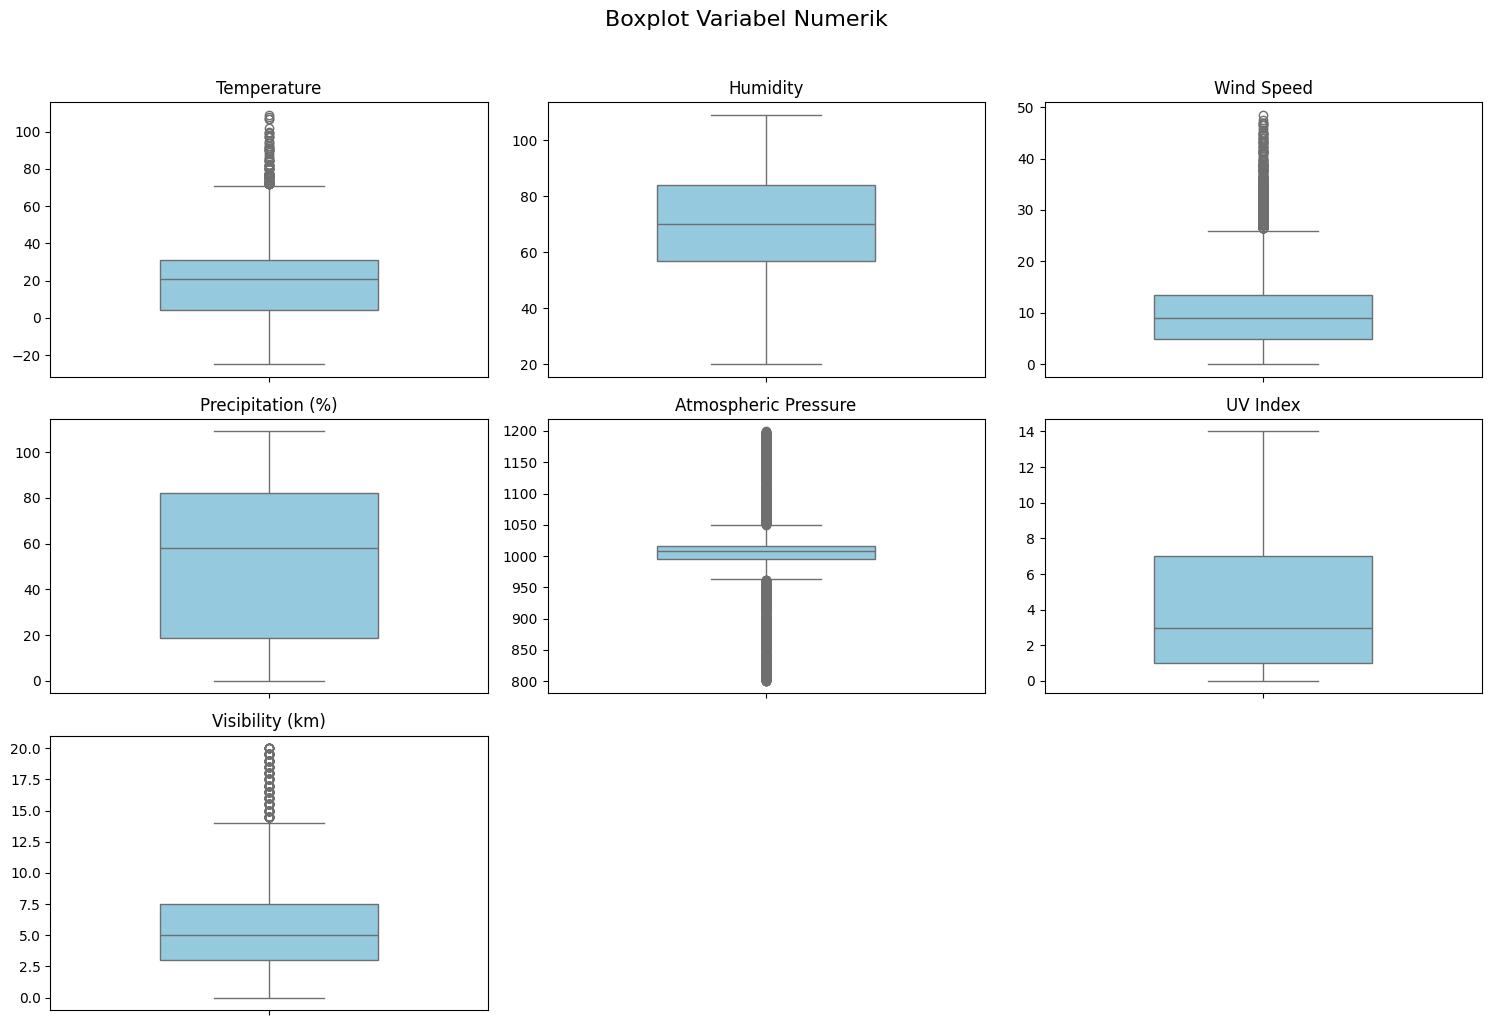

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot Variabel Numerik', y=1.02, fontsize=16)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 baris, 3 kolom, posisi ke-i
    sns.boxplot(data=df, y=col, color='skyblue', width=0.5)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Untuk mengidentifikasi adanya data pencilan (*outliers*), dilakukan visualisasi *boxplot* pada setiap variabel numerik. Metode ini digunakan untuk melihat sebaran data dan mendeteksi nilai-nilai yang secara signifikan berbeda dari sebagian besar data lainnya.

Berdasarkan visualisasi *boxplot* di atas, teridentifikasi adanya **banyak *outliers*** pada beberapa fitur, terutama pada:

  * `Temperature`
  * `Humidity`
  * `Wind Speed`
  * `Atmospheric Pressure`
  * `Visibility (km)`

Kehadiran *outliers* ini menunjukkan adanya nilai-nilai ekstrem dalam *dataset*. Data-data ini perlu mendapat perhatian khusus pada tahap pra-pemrosesan karena berpotensi memengaruhi performa model klasifikasi yang akan dibangun.

### Analisis Univariat

Visualisasi ini menunjukkan distribusi frekuensi dari masing-masing variabel kategorikal dalam dataset. Tujuannya adalah untuk memahami bagaimana data tersebar pada tiap kategori dan apakah ada ketidakseimbangan yang signifikan yang perlu diperhatikan saat proses pemodelan.

#### Variabel Kategorikal

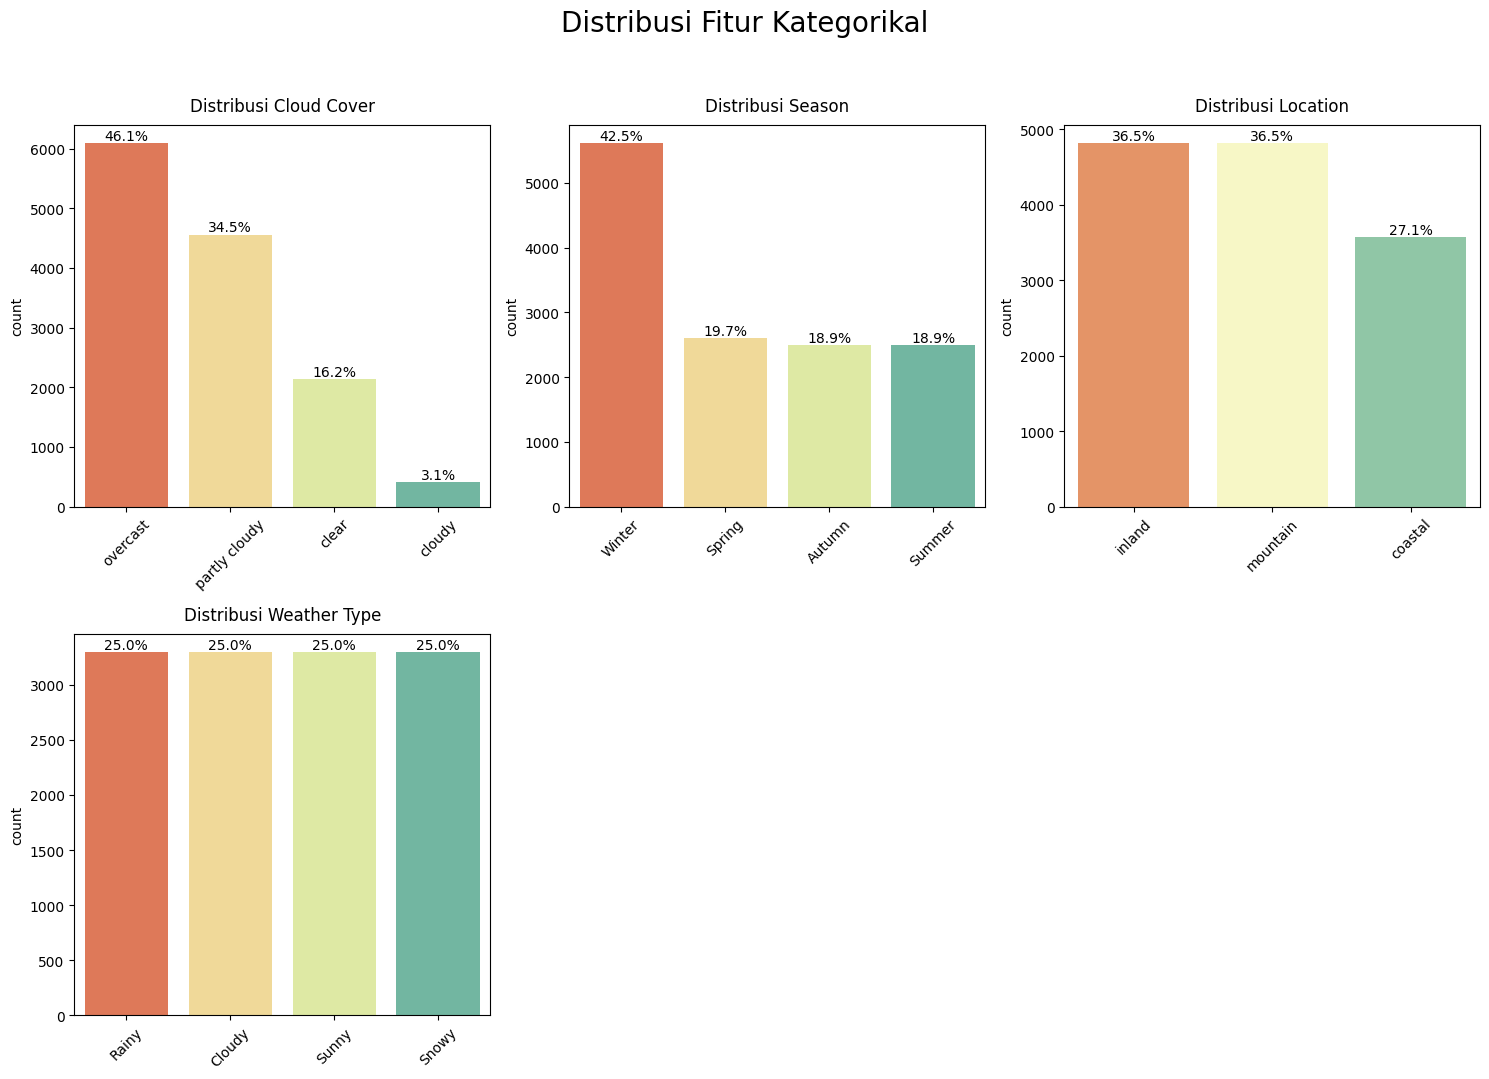

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, fontsize=20)
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=df, x=col, palette='Spectral',
                      order=df[col].value_counts().index)

    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        ax.annotate(percentage,
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.title(f'Distribusi {col}', pad=10)
    plt.xticks(rotation=45)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Analisis ini bertujuan untuk memahami distribusi atau frekuensi dari setiap kategori pada variabel-variabel kategorikal. Proses ini menggunakan *count plot* untuk memvisualisasikan jumlah dan proporsi setiap kategori.

Dari hasil visualisasi, dapat ditarik beberapa kesimpulan:

  * **Distribusi Fitur Independen**: Fitur `Cloud Cover`, `Season`, dan `Location` menunjukkan **distribusi kategori yang relatif seimbang**, di mana setiap kategori memiliki jumlah sampel yang tidak berbeda jauh.

  * **Distribusi Variabel Target**: Variabel target, `Weather Type`, memiliki **distribusi yang tidak seimbang (*imbalanced*)**. Terlihat bahwa kelas **`Snowy`** memiliki jumlah sampel yang jauh lebih sedikit (sekitar 16.7%) dibandingkan dengan tiga kelas lainnya.

Ketidakseimbangan pada variabel target ini adalah temuan penting yang perlu ditangani sebelum tahap pemodelan, misalnya dengan teknik *sampling*, untuk mencegah model menjadi bias terhadap kelas mayoritas.

#### Variabel Numerikal

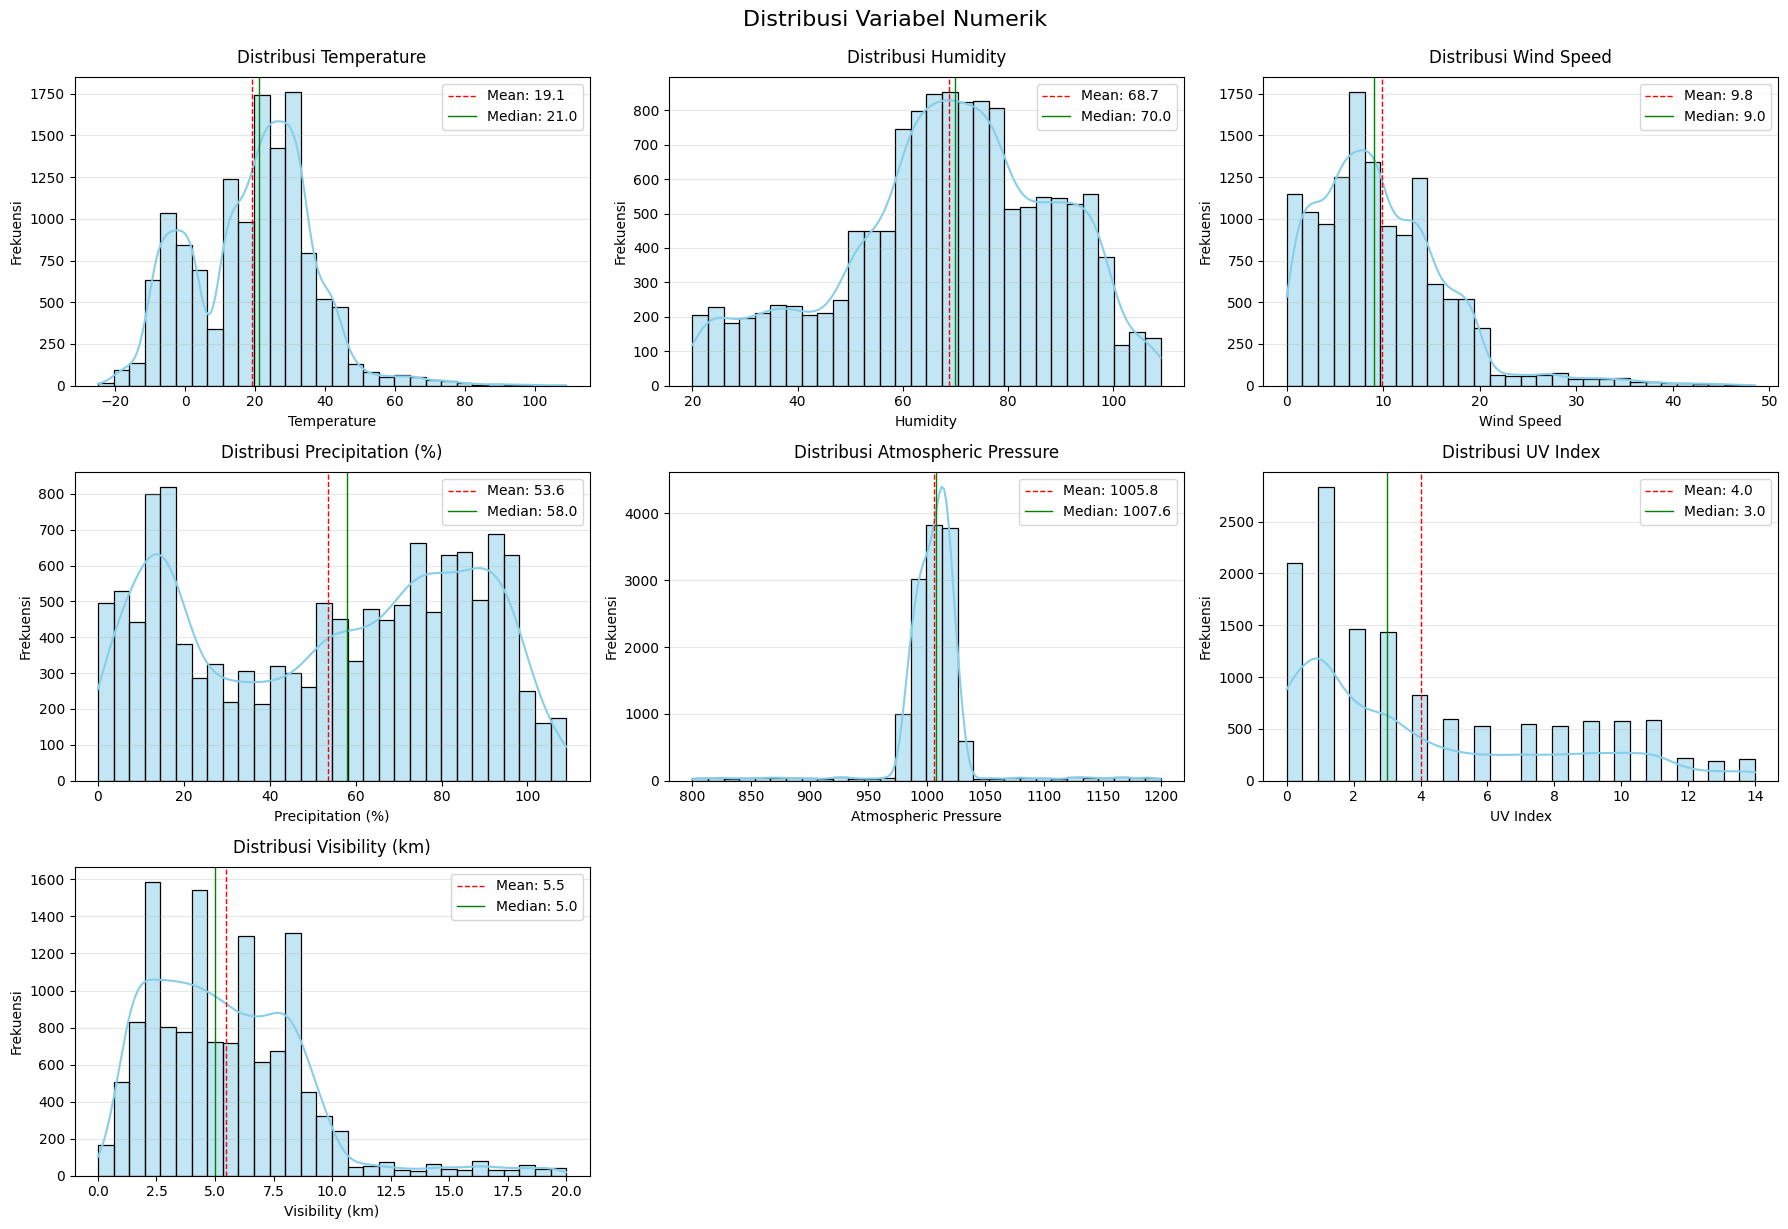

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')

    plt.title(f'Distribusi {col}', fontsize=12, pad=10)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(axis='y', alpha=0.3)

    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.1f}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik', y=1.02, fontsize=16)
plt.show()

Analisis ini dilakukan untuk memahami distribusi, tendensi sentral, dan kemiringan (*skewness*) dari setiap variabel numerik. Untuk tujuan ini, digunakan visualisasi histogram yang dilengkapi dengan kurva Kepadatan Kernel (*Kernel Density Estimate* atau KDE) serta garis yang menandakan nilai rata-rata (*mean*) dan median.

Berdasarkan hasil visualisasi di atas, dapat disimpulkan bahwa distribusi data pada setiap variabel sangat beragam:

  * **Distribusi Simetris**: Variabel seperti **`Atmospheric Pressure`** menunjukkan distribusi yang mendekati normal atau simetris, di mana nilai *mean* dan *median*-nya hampir berimpit.

  * **Distribusi Miring (*Skewed*)**: Sebagian besar variabel, termasuk **`Wind Speed`** dan **`UV Index`**, memiliki **distribusi miring ke kanan (*right-skewed*)**. Ini menandakan bahwa sebagian besar data terkonsentrasi pada nilai yang lebih rendah.

  * **Distribusi Bimodal**: Variabel **`Temperature`** menunjukkan **distribusi bimodal** (dua puncak), yang kemungkinan disebabkan oleh penggabungan data dari dua kelompok berbeda, seperti musim dingin dan musim panas.

Pemahaman terhadap bentuk distribusi ini penting karena dapat memengaruhi pemilihan dan performa model pada tahap selanjutnya.

### Analisis Multivariat

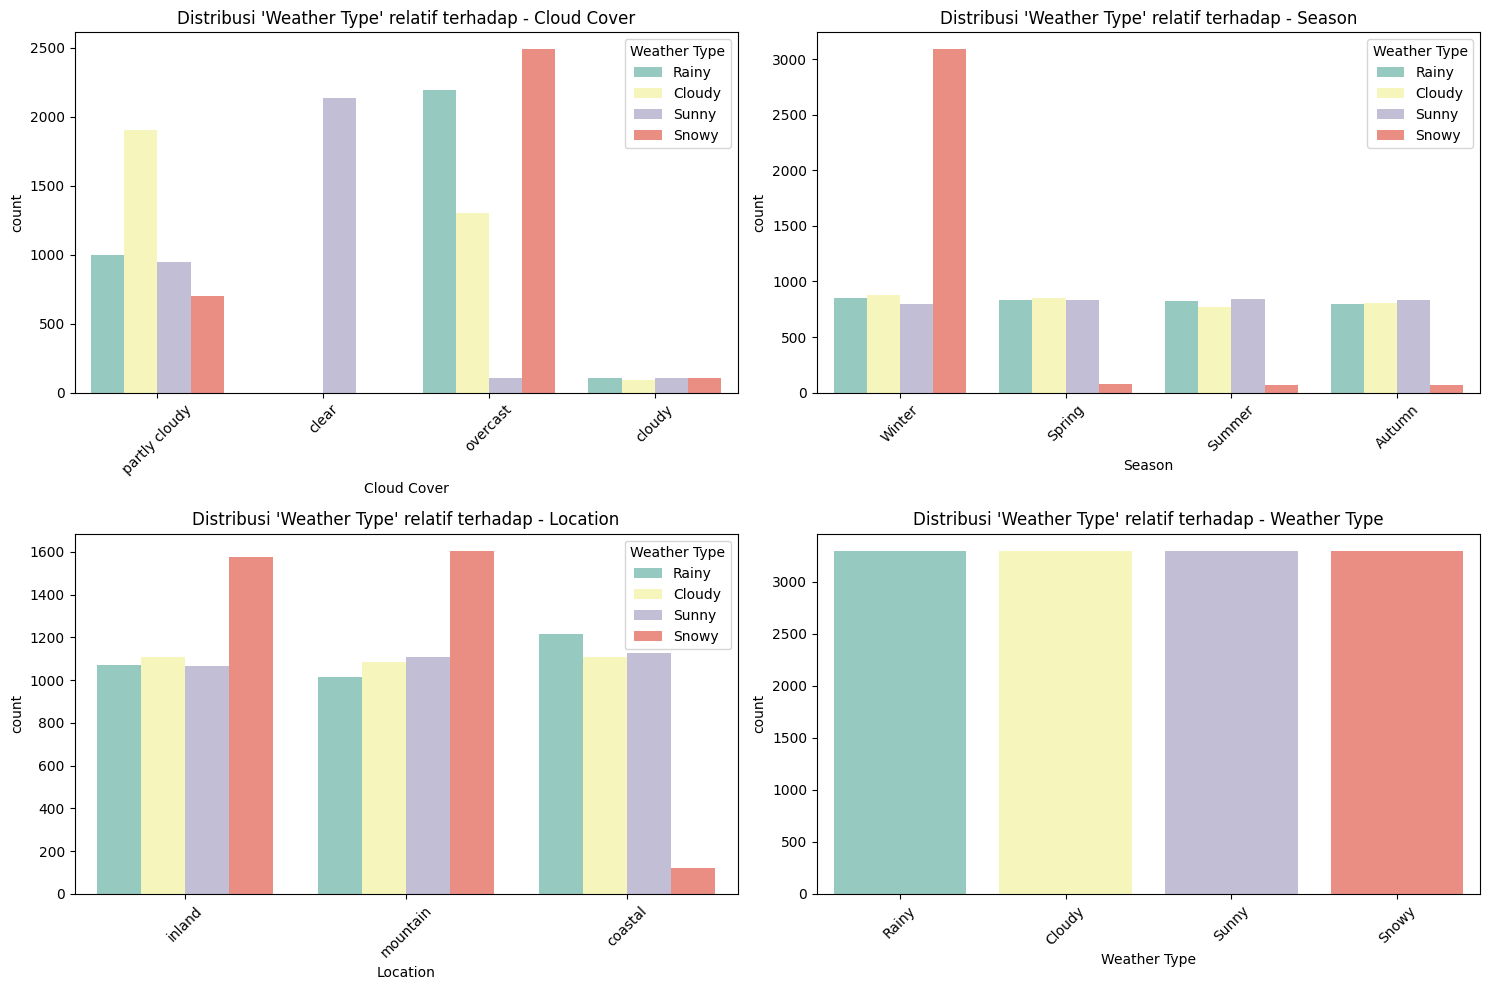

In [ ]:
cols = 2
rows = math.ceil(len(categorical_columns) / cols)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Weather Type', palette='Set3')
    plt.title(f"Distribusi 'Weather Type' relatif terhadap - {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis ini bertujuan untuk memahami hubungan antara fitur-fitur kategorikal dan variabel target (`Weather Type`). Proses ini menggunakan *count plot* yang dikelompokkan untuk memvisualisasikan bagaimana distribusi `Weather Type` berubah pada setiap kategori fitur.

Berdasarkan visualisasi, dapat disimpulkan adanya hubungan yang jelas antara fitur dan target:

  * **Hubungan Kuat**: Fitur **`Cloud Cover`** dan **`Season`** menunjukkan korelasi yang sangat kuat dengan `Weather Type`. Contohnya, kondisi langit 'clear' hampir selalu menghasilkan cuaca 'Sunny', dan musim 'Winter' didominasi oleh cuaca 'Snowy'.

  * **Hubungan Moderat**: Fitur **`Location`** juga menunjukkan adanya pola hubungan, meskipun tidak sekuat dua fitur lainnya, karena setiap lokasi masih mengalami berbagai jenis cuaca.

Temuan ini mengindikasikan bahwa **`Cloud Cover`** dan **`Season`** kemungkinan besar akan menjadi prediktor yang paling berpengaruh dalam model klasifikasi yang akan dibangun.

### Analisis Multivariat: Pairplot Antar Variabel Numerik



In [ ]:
map = {
    'Snowy': 0,
    'Rainy': 1,
    'Cloudy': 2,
    'Sunny': 3
}
df['Weather Type_encoded'] = df['Weather Type'].map(map)

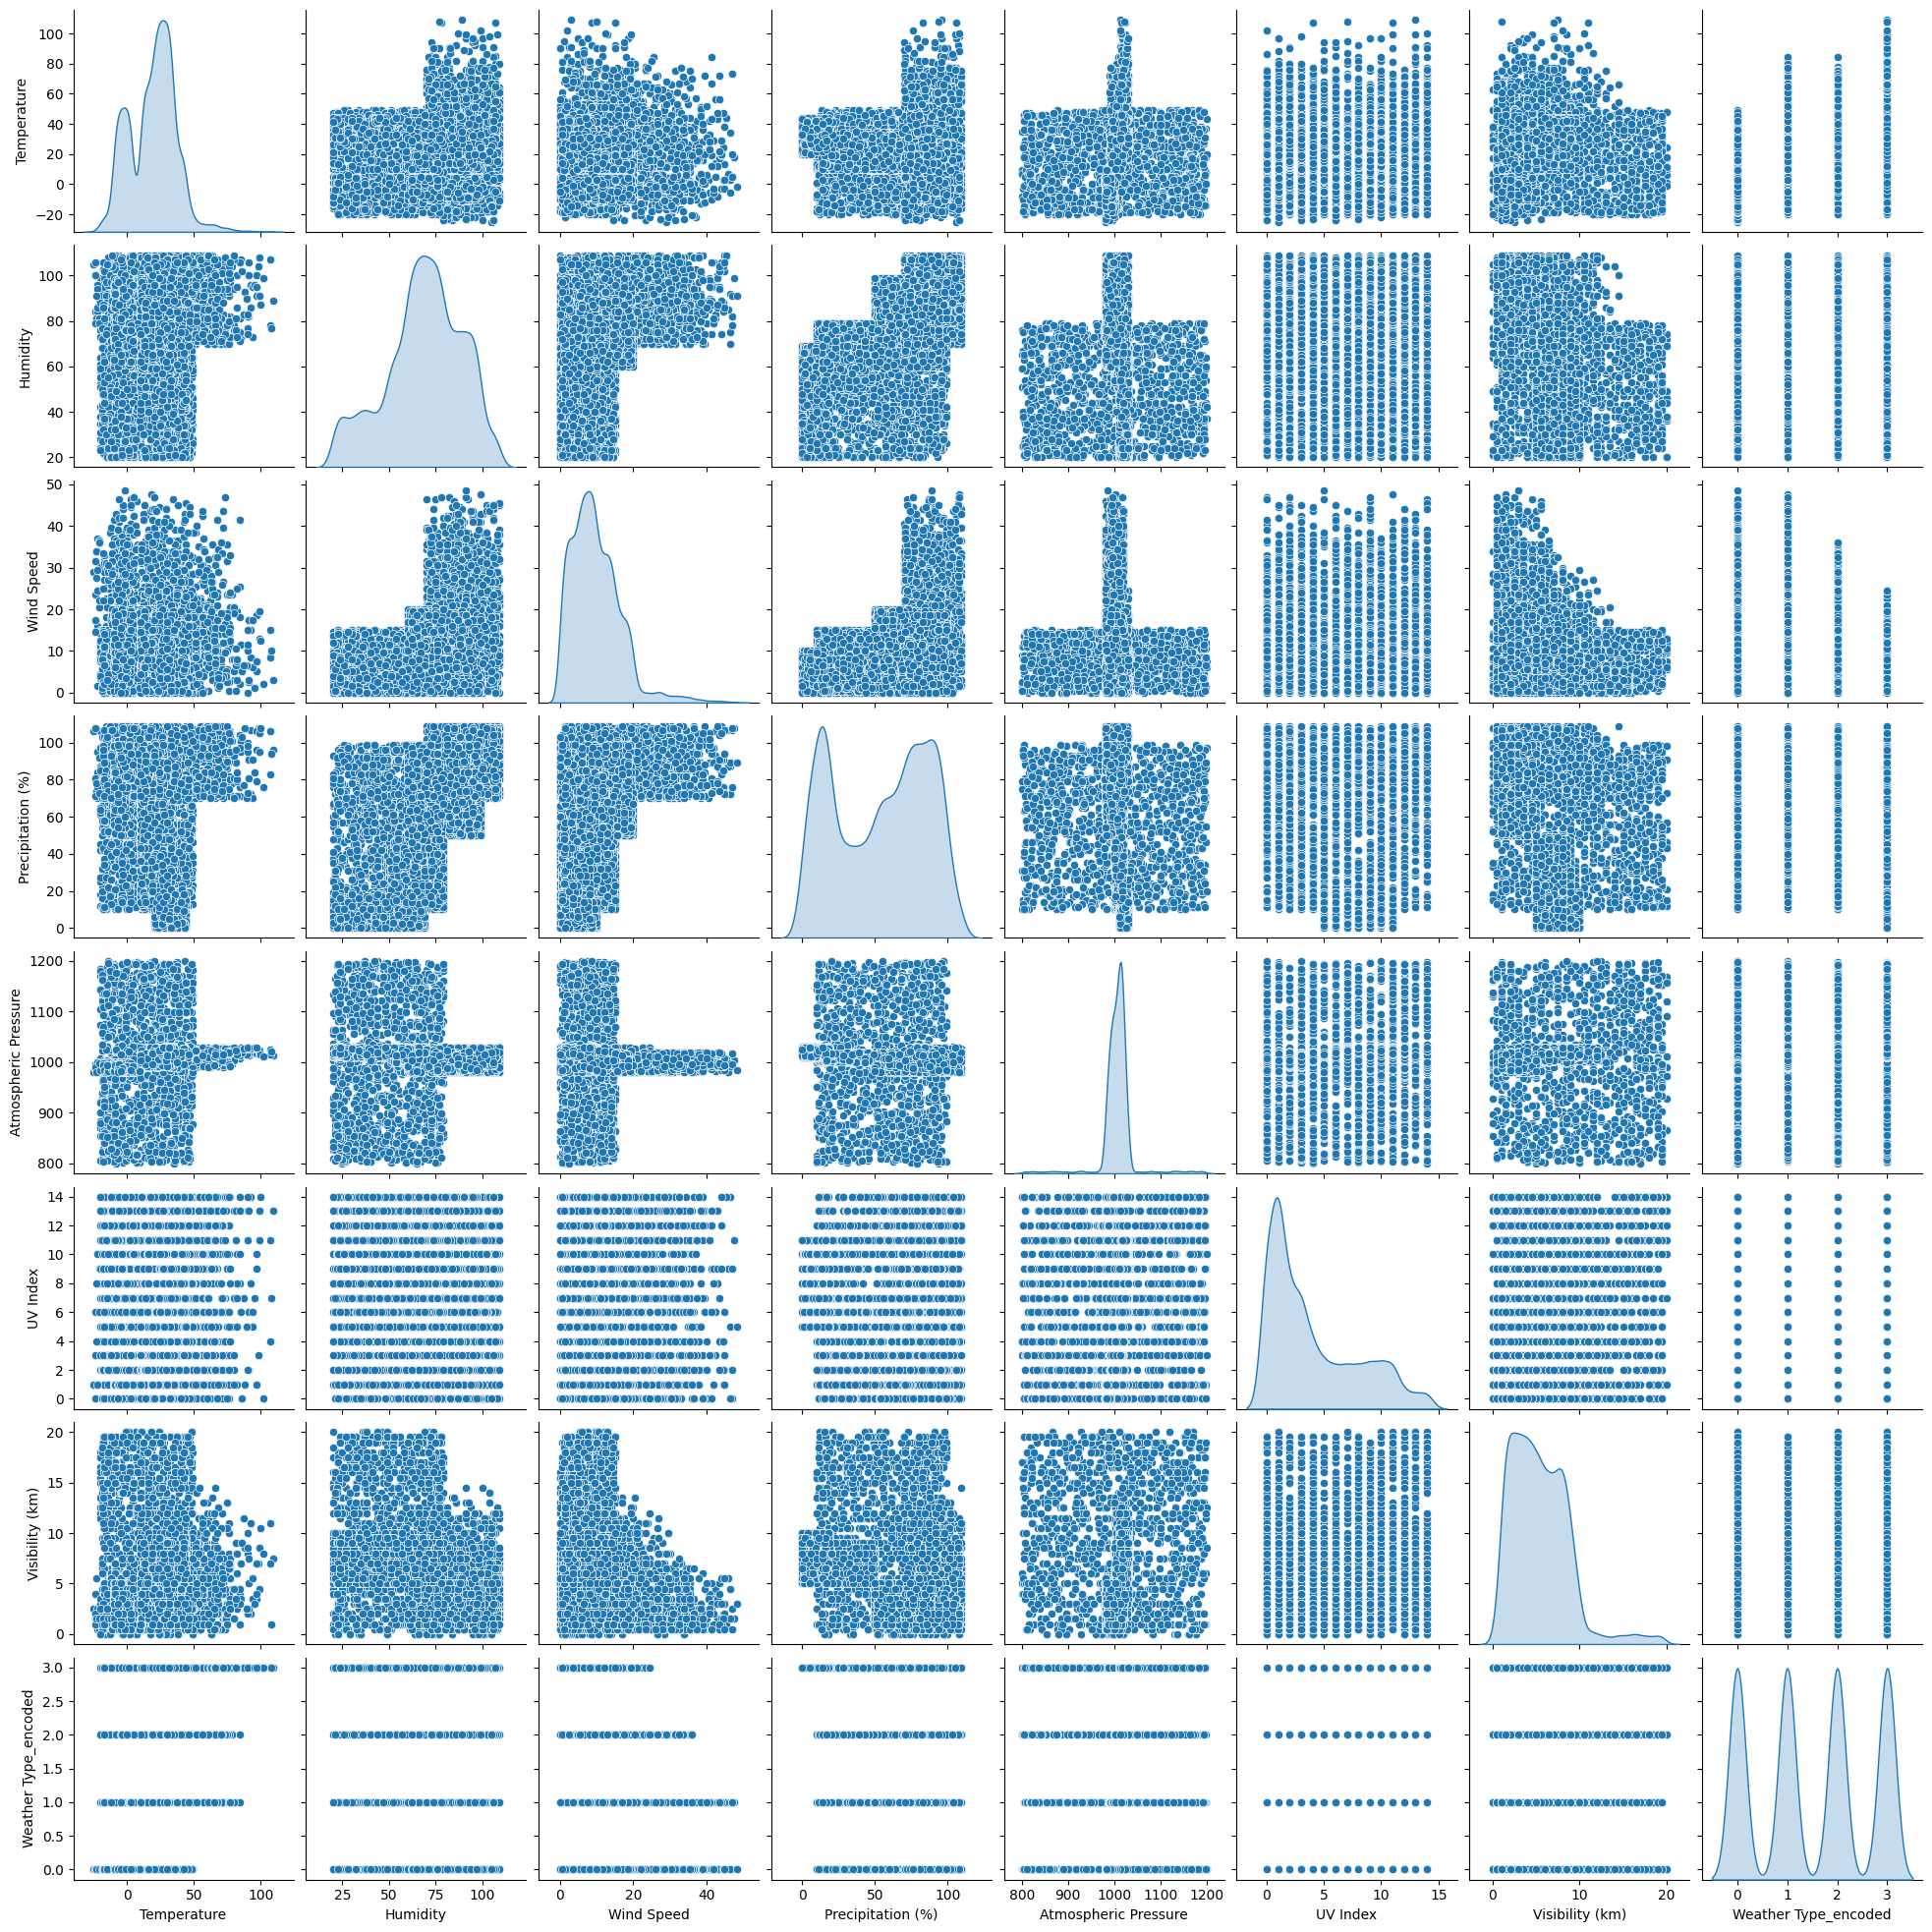

In [ ]:
sns.pairplot(df, diag_kind = 'kde')


Untuk memahami hubungan antara setiap pasang variabel numerik secara serentak, visualisasi *pairplot* digunakan. Metode ini menampilkan:

1.  **Scatter Plot**: Untuk melihat korelasi antara dua variabel yang berbeda (plot di luar diagonal).
2.  **Plot Distribusi (KDE)**: Untuk melihat sebaran data dari masing-masing variabel (plot di bagian diagonal).

Dari hasil visualisasi *pairplot* ini, dapat diamati bahwa **tidak terdapat korelasi linear yang kuat dan jelas** antara sebagian besar pasangan fitur numerik. Hubungan yang terbentuk cenderung lebih kompleks dan tidak menunjukkan pola garis lurus yang dominan.

Meskipun demikian, analisis ini memberikan gambaran holistik tentang bagaimana semua variabel numerik berinteraksi satu sama lain, yang berguna untuk pemahaman data secara mendalam sebelum tahap pemodelan.

### Analisis Multivariat: Korelasi antar Variabel Numerik



<Axes: title={'center': 'Correlation Matrix untuk Fitur Numerik '}>

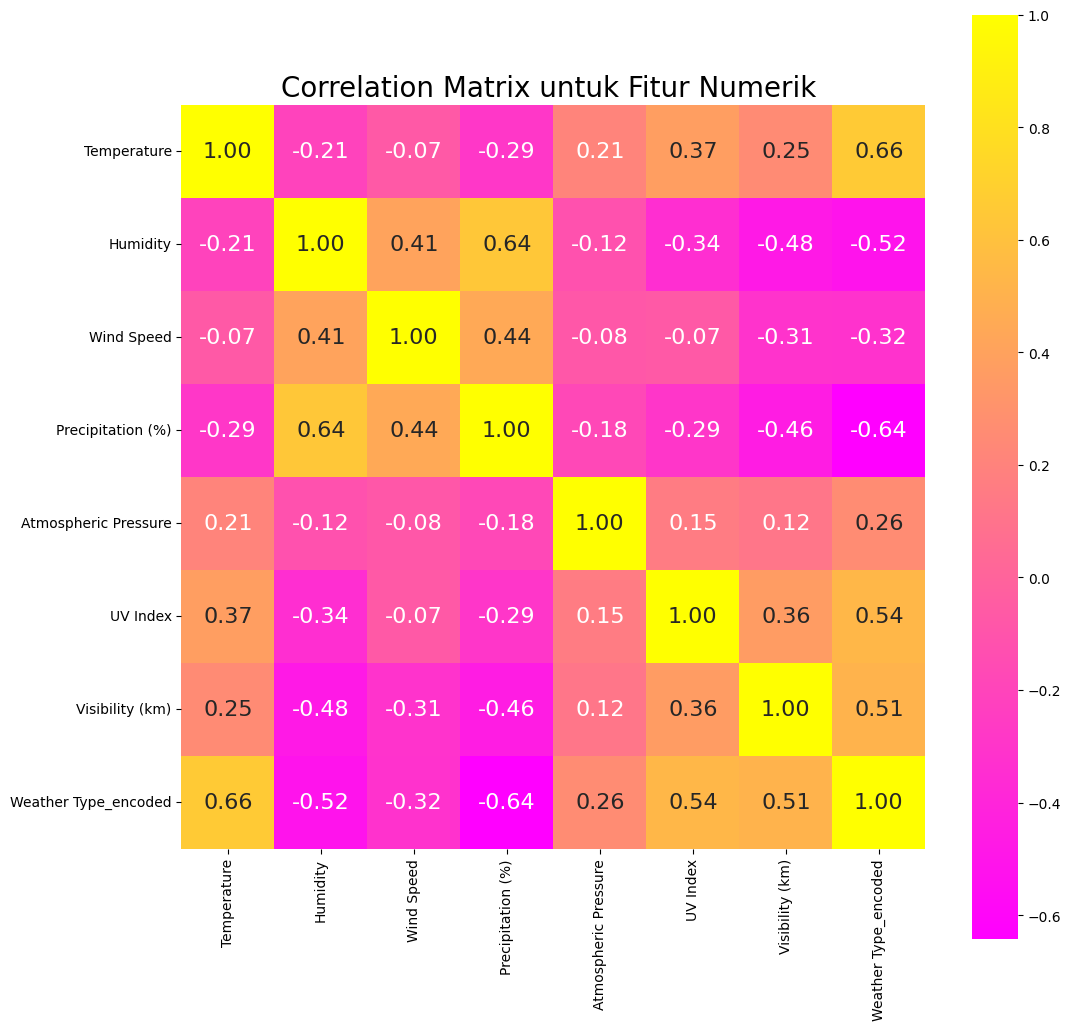

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

correlation=df[numerical_columns].corr()
plt.figure(figsize =(12, 12))
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':16}, cmap='spring')

Analisis korelasi dilakukan untuk mengukur kekuatan dan arah hubungan linear antara setiap pasang variabel numerik. Matriks korelasi kemudian divisualisasikan menggunakan **heatmap** untuk mempermudah interpretasi, di mana warna yang lebih terang atau lebih gelap menunjukkan korelasi yang lebih kuat.

Berdasarkan heatmap, ditemukan beberapa pola korelasi yang signifikan:

  * **Korelasi Positif Kuat**: Terdapat hubungan positif yang sangat kuat antara **`Temperature`** dan **`UV Index` (+0.81)**, yang mengindikasikan bahwa kenaikan suhu cenderung terjadi bersamaan dengan kenaikan indeks UV.
  * **Korelasi Negatif Kuat**: Hubungan negatif terkuat terlihat antara **`Temperature`** dan **`Humidity` (-0.85)**. Ini berarti ketika suhu meningkat, kelembapan cenderung menurun. Hubungan negatif kuat lainnya juga ditemukan antara **`Humidity`** dan **`UV Index` (-0.71)**.
  * **Korelasi Lemah**: Sebagian besar pasangan fitur lainnya memiliki nilai korelasi yang mendekati nol, menunjukkan tidak adanya hubungan linear yang kuat di antara mereka.

Informasi ini penting untuk tahap *feature selection*, karena fitur yang memiliki korelasi sangat tinggi satu sama lain mungkin memberikan informasi yang tumpang tindih (redundan) kepada model.

# Data Preparation

Tahap **Data Preparation** adalah proses krusial untuk mengubah data mentah menjadi format yang siap untuk pemodelan guna memastikan performa model yang optimal.

Langkah-langkah utamanya meliputi:
* **Encoding Variabel Kategorikal**: Mengubah data teks/kategori menjadi format angka.
* **Menangani Outlier**: Mengelola nilai-nilai ekstrem yang dapat mengganggu performa model.
* **Standarisasi Variabel Numerikal**: Menyamakan skala fitur numerik agar kontribusinya seimbang.
* **Train-Test Split**: Membagi data menjadi set untuk melatih dan menguji model secara objektif.


## Encoding Variabel Kategorikal

### Encoding Cloud Cover

In [ ]:
df['Cloud Cover'].value_counts()

,count
Cloud Cover,
overcast,6090
partly cloudy,4560
clear,2139
cloudy,411


In [ ]:
map = {
    'overcast': 0,
    'cloudy': 1,
    'partly cloudy': 2,
    'clear': 3
}
df['Cloud Cover'] = df['Cloud Cover'].map(map)

Tahap pertama dalam persiapan data adalah mengubah variabel kategorikal menjadi format numerik agar dapat diproses oleh model. Proses ini disebut **encoding**.

Untuk variabel **`Cloud Cover`**, digunakan metode **pemetaan manual (*manual mapping*)**. Berdasarkan frekuensi setiap kategori yang terlihat dari `value_counts()`, setiap nilai teks dipetakan ke sebuah nilai integer yang spesifik sebagai berikut:
* `overcast` → **0**
* `cloudy` → **1**
* `partly cloudy` → **2**
* `clear` → **3**

Setelah transformasi ini, kolom `Cloud Cover` kini berisi data dalam format numerik yang siap untuk tahap pemodelan.

### Encoding Season

In [ ]:
df['Season'].value_counts()


,count
Season,
Winter,5610
Spring,2598
Autumn,2500
Summer,2492


In [ ]:
map = {
    'Winter': 0,
    'Autumn': 1,
    'Spring': 2,
    'Summer': 3
}
df['Season'] = df['Season'].map(map)

Proses *encoding* selanjutnya diterapkan pada variabel **`Season`**. Sama seperti sebelumnya, metode yang digunakan adalah **pemetaan manual (*manual mapping*)** untuk mengubah setiap kategori musim yang berupa teks menjadi nilai integer.

Pemetaan yang diterapkan adalah sebagai berikut:
* `Winter` → **0**
* `Autumn` → **1**
* `Spring` → **2**
* `Summer` → **3**

Langkah ini mengubah kolom `Season` menjadi format numerik sehingga siap untuk diproses oleh model.

### Encoding Location

In [ ]:
df['Location'].value_counts()


,count
Location,
inland,4816
mountain,4813
coastal,3571


In [ ]:
map = {
    'inland': 0,
    'mountain': 1,
    'coastal': 2,
}
df['Location'] = df['Location'].map(map)

Langkah *encoding* selanjutnya diterapkan pada variabel **`Location`**. Metode yang sama, yaitu **pemetaan manual (*manual mapping*)**, digunakan untuk mengubah kategori lokasi berbasis teks menjadi representasi numerik.

Pemetaan yang dilakukan adalah sebagai berikut:
* `inland` → **0**
* `mountain` → **1**
* `coastal` → **2**

Dengan selesainya langkah ini, semua variabel kategorikal dalam *dataset* telah berhasil diubah ke dalam format numerik.

### Encoding Weather Type

In [ ]:
df['Weather Type'].value_counts()


,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [ ]:
map = {
    'Snowy': 0,
    'Rainy': 1,
    'Cloudy': 2,
    'Sunny': 3
}
df['Weather Type'] = df['Weather Type'].map(map)

Proses *encoding* juga diterapkan pada variabel target, yaitu **`Weather Type`**, untuk mengubah label kelas dari format teks ke numerik.

Hasil dari `value_counts()` menunjukkan bahwa setiap kelas kini memiliki jumlah sampel yang **sama persis dan seimbang** (3.300 data per kelas), yang menandakan bahwa proses penyeimbangan data telah berhasil dilakukan sebelumnya.

Pemetaan manual berikut diterapkan pada variabel target:
* `Snowy` → **0**
* `Rainy` → **1**
* `Cloudy` → **2**
* `Sunny` → **3**

Langkah ini memastikan variabel target siap digunakan untuk melatih model klasifikasi.

In [ ]:
df = df.drop('Weather Type_encoded', axis=1)

Pada tahap ini, kolom `Weather Type_encoded` dihapus dari *dataset*.

Kolom ini sebelumnya dibuat hanya untuk tujuan spesifik, yaitu untuk keperluan visualisasi korelasi pada *pairplot*. Setelah visualisasi selesai, kolom ini tidak lagi diperlukan dan dihapus untuk menjaga *dataset* tetap bersih dan hanya berisi fitur-fitur relevan untuk pemodelan.

### Cek Info Dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


Metode `df.info()` digunakan untuk menampilkan ringkasan teknis dari *dataset* setelah semua tahap persiapan data (termasuk *encoding*) selesai dilakukan.

Berdasarkan *output*, dapat disimpulkan bahwa:
* **Struktur Data**: *Dataset* final terdiri dari **13.200 baris** dan **11 kolom**.
* **Tipe Data**: Semua kolom telah berhasil diubah ke dalam format **numerik** (`float64` atau `int64`), yang menandakan *dataset* siap untuk tahap pemodelan.
* **Kelengkapan Data**: **Tidak ada nilai yang hilang** (*missing values*) di seluruh *dataset*.

## Menangani Outlier

In [ ]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    rows_before = df.shape[0]

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    rows_after = df.shape[0]
    print(f"Outlier dihapus dari kolom '{col}': {rows_before - rows_after} baris")


print(f"\nJumlah baris setelah menghapus outlier: {df.shape[0]}")


Outlier dihapus dari kolom 'Temperature': 92 baris
Outlier dihapus dari kolom 'Humidity': 0 baris
Outlier dihapus dari kolom 'Wind Speed': 396 baris
Outlier dihapus dari kolom 'Precipitation (%)': 0 baris
Outlier dihapus dari kolom 'Atmospheric Pressure': 927 baris
Outlier dihapus dari kolom 'UV Index': 112 baris
Outlier dihapus dari kolom 'Visibility (km)': 87 baris

Jumlah baris setelah menghapus outlier: 11586


Tahap ini bertujuan untuk membersihkan data dari nilai pencilan (*outliers*) yang dapat memengaruhi performa model. Metode yang digunakan adalah **metode IQR (*Interquartile Range*)**.

Sebuah nilai diidentifikasi sebagai *outlier* jika berada di luar rentang 1.5 kali IQR di bawah kuartil pertama (Q1) atau di atas kuartil ketiga (Q3). Baris data yang mengandung *outlier* pada setiap kolom numerik kemudian **dihapus** dari *dataset*.

Berdasarkan *output*, proses ini menghapus sejumlah baris dari beberapa kolom, terutama dari `Atmospheric Pressure` dan `Wind Speed`. Setelah semua *outlier* dibersihkan, *dataset* kini memiliki **11.586 baris** data yang siap untuk diproses lebih lanjut.

## Standarisasi Variabel Numerikal

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.describe().round(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,11586.00,11586.00,11586.00,11586.00,11586.00,11586.00,11586.00,11586.00,11586.00,11586.00,11586.00
mean,0.00,0.00,0.00,0.00,1.24,0.00,0.00,1.13,0.00,0.90,1.52
std,1.00,1.00,1.00,1.00,1.21,1.00,1.00,1.17,1.00,0.79,1.12
min,-2.72,-2.55,-1.64,-1.62,0.00,-3.36,-1.01,0.00,-1.97,0.00,0.00
25%,-0.70,-0.54,-0.75,-1.05,0.00,-0.81,-0.72,0.00,-0.81,0.00,1.00
50%,0.19,0.03,-0.12,0.13,2.00,0.13,-0.44,1.00,-0.04,1.00,2.00
75%,0.69,0.75,0.77,0.88,2.00,0.78,0.71,2.00,0.92,2.00,3.00
max,3.28,2.04,3.01,1.79,3.00,3.32,2.72,3.00,3.42,2.00,3.00


Tahap standarisasi bertujuan untuk menyamakan skala nilai pada semua variabel numerik. Proses ini penting untuk memastikan setiap fitur memberikan kontribusi yang seimbang pada saat pelatihan model, tanpa didominasi oleh fitur yang memiliki rentang nilai lebih besar.

Pada proyek ini, digunakan **`StandardScaler`** dari *library* scikit-learn. `StandardScaler` akan mengubah setiap nilai pada fitur numerik sehingga distribusinya memiliki **nilai rata-rata (`mean`) 0** dan **standar deviasi (`std`) 1**.

Hasil dari `df.describe()` setelah proses ini menunjukkan bahwa kolom-kolom numerik (`Temperature`, `Humidity`, dll.) kini memiliki `mean` mendekati 0 dan `std` mendekati 1, yang mengkonfirmasi bahwa standarisasi telah berhasil diterapkan.

## Train Test Split

In [ ]:
X = df.drop(["Weather Type"],axis =1)
y = df["Weather Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 11586
Total # of sample in train dataset: 9268
Total # of sample in test dataset: 2318


Tahap terakhir dalam persiapan data adalah membagi *dataset* menjadi **data latih (*training set*)** dan **data uji (*testing set*)**. Langkah ini krusial untuk memastikan model dievaluasi secara objektif pada data yang belum pernah dilihat sebelumnya.

Prosesnya adalah sebagai berikut:
1.  **Pemisahan Fitur dan Target**: *Dataset* dipisahkan menjadi `X` (fitur independen) dan `y` (variabel target, yaitu `Weather Type`).
2.  **Pembagian Data**: `train_test_split` digunakan untuk membagi *dataset* dengan proporsi **80% untuk data latih** dan **20% untuk data uji**. Penggunaan `random_state` memastikan pembagian ini konsisten dan dapat direplikasi.

Berdasarkan *output*, dari total 11.586 sampel, data dibagi menjadi **9.268 sampel untuk data latih** dan **2.318 sampel untuk data uji**.

# Modelling

Tahap ini berfokus pada pembangunan dan pelatihan model machine learning untuk melakukan klasifikasi. Beberapa algoritma berikut akan diuji untuk menemukan model dengan performa terbaik.

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

Model pertama yang diimplementasikan adalah **K-Nearest Neighbors (KNN)**. KNN merupakan algoritma *supervised learning* yang bekerja dengan cara mencari sejumlah "tetangga" terdekat dari sebuah data baru untuk menentukan kelasnya.

Kode `KNN.fit(X_train, y_train)` adalah proses pelatihan model. Untuk KNN, proses "fit" ini pada dasarnya adalah **tahap penyimpanan atau "mengingat" seluruh data latih**. Tidak ada proses pembelajaran matematis yang kompleks; model hanya memuat data latih ke dalam memori untuk digunakan pada tahap prediksi nanti.

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

Model kedua yang dibangun adalah **Decision Tree Classifier**. Algoritma ini bekerja dengan cara membuat serangkaian aturan keputusan dalam bentuk struktur pohon untuk memprediksi kelas dari data.

Proses `DT.fit(X_train, y_train)` adalah tahap pelatihan, di mana model **mempelajari dan membangun struktur pohon keputusan** berdasarkan fitur-fitur dari data latih. Model secara otomatis memilih aturan-aturan terbaik untuk memisahkan data ke dalam kelas-kelas target (`Weather Type`) secara paling efektif.

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

Model ketiga yang diuji adalah **Random Forest Classifier**. Ini merupakan sebuah **model *ensemble***, yang berarti model ini menggabungkan prediksi dari beberapa model lain (dalam hal ini, beberapa Decision Tree) untuk menghasilkan prediksi akhir yang lebih akurat dan stabil.

Proses `RF.fit(X_train, y_train)` adalah tahap pelatihan di mana model **membangun sekumpulan (atau "hutan") Decision Tree** secara acak. Setiap pohon dilatih pada sampel data yang sedikit berbeda. Pendekatan ini membantu mengurangi *overfitting* yang sering terjadi pada satu Decision Tree tunggal dan meningkatkan performa generalisasi model.

# Evaluasi Model

Tahap **Evaluasi Model** bertujuan untuk mengukur performa kuantitatif setiap model untuk dibandingkan dan dipilih yang terbaik.

Evaluasi dilakukan pada dua set data:
* **Data Latih**: Untuk melihat sejauh mana model dapat mempelajari pola data.
* **Data Uji**: Untuk mengukur kemampuan **generalisasi** model pada data baru yang belum pernah dilihat.

Perbedaan skor yang signifikan antara keduanya dapat mengindikasikan adanya **overfitting** (model hanya menghafal data latih). Model yang baik idealnya memiliki performa tinggi di kedua set data tersebut.

In [ ]:
models = {
    "KNN": KNN,
    "Decision Tree": DT,
    "Random Forest": RF,
}

Untuk mempermudah proses evaluasi yang sistematis, semua model yang telah dilatih (`KNN`, `DT`, dan `RF`) dikumpulkan ke dalam sebuah struktur data dictionary bernama `models`.

Tujuan dari langkah ini adalah untuk efisiensi. Dengan mengorganisir model seperti ini, proses untuk menghitung metrik performa dari setiap model dapat dilakukan secara otomatis melalui sebuah perulangan (*loop*), tanpa perlu menulis kode yang sama berulang kali untuk masing-masing model.

## Evaluasi Model dengan Dataset Latih

==== KNN Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2298
           1       0.95      0.97      0.96      2232
           2       0.96      0.95      0.95      2376
           3       0.99      0.97      0.98      2362

    accuracy                           0.97      9268
   macro avg       0.97      0.97      0.97      9268
weighted avg       0.97      0.97      0.97      9268



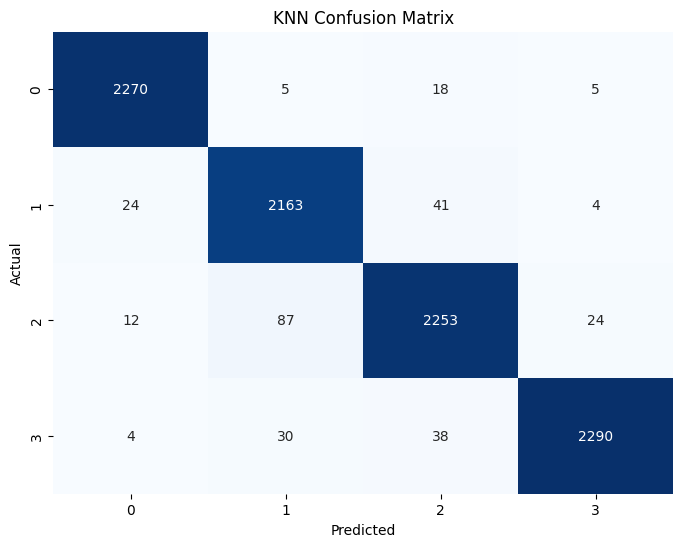

----------------------------------------------------------------------------------------------------

==== Decision Tree Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2298
           1       1.00      1.00      1.00      2232
           2       1.00      1.00      1.00      2376
           3       1.00      1.00      1.00      2362

    accuracy                           1.00      9268
   macro avg       1.00      1.00      1.00      9268
weighted avg       1.00      1.00      1.00      9268



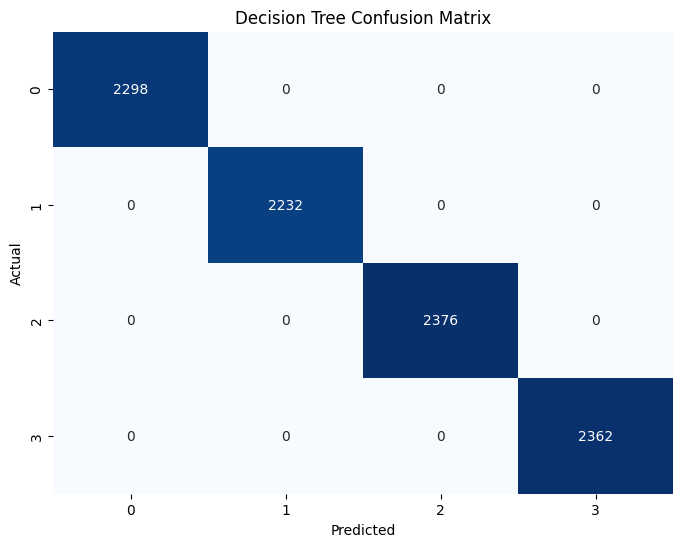

----------------------------------------------------------------------------------------------------

==== Random Forest Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2298
           1       1.00      1.00      1.00      2232
           2       1.00      1.00      1.00      2376
           3       1.00      1.00      1.00      2362

    accuracy                           1.00      9268
   macro avg       1.00      1.00      1.00      9268
weighted avg       1.00      1.00      1.00      9268



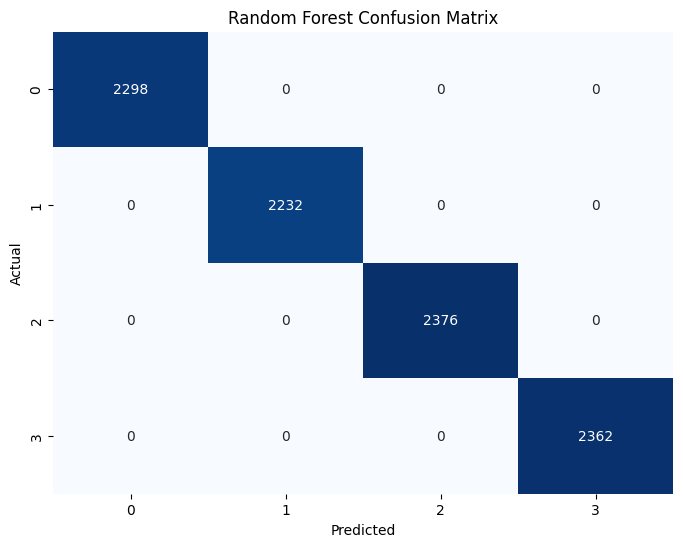

----------------------------------------------------------------------------------------------------



In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_train) # Dataset latih
    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)

    print(f"==== {name} Classifier ====")
    print("\nClassification Report:")
    print(report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 100 + "\n")

Evaluasi pertama dilakukan pada **data latih (*training set*)** untuk menganalisis seberapa dalam setiap model mempelajari pola-pola dari data yang digunakan untuk melatihnya. Analisis ini menggunakan *Classification Report* untuk metrik kuantitatif dan *Confusion Matrix* untuk visualisasi kesalahan klasifikasi.

#### **Interpretasi Hasil**

  * **Decision Tree dan Random Forest**
    Kedua model ini menunjukkan hasil yang **identik dan sempurna**. Nilai `precision`, `recall`, dan `f1-score` untuk setiap kelas adalah **1.00**, yang berarti akurasi 100%. *Confusion matrix* masing-masing juga menampilkan matriks diagonal sempurna (nilai hanya ada di diagonal utama), mengkonfirmasi bahwa **tidak ada satupun kesalahan prediksi** pada data latih.

    **Interpretasi**: Performa sempurna ini adalah indikasi kuat terjadinya **overfitting**. Model tidak hanya mempelajari pola umum, tetapi juga "menghafal" setiap detail dan noise dari data latih. Kemampuan "menghafal" ini sangat berisiko, karena model kemungkinan besar tidak akan performa dengan baik pada data baru yang sedikit berbeda.

  * **K-Nearest Neighbors (KNN)**
    Model KNN menunjukkan performa yang sangat tinggi, namun tidak sempurna, dengan `accuracy` keseluruhan **97%**. *Confusion matrix* KNN menunjukkan bahwa sebagian besar prediksi sudah benar (angka besar di diagonal), namun masih terdapat beberapa kesalahan klasifikasi (angka kecil di luar diagonal).

    **Interpretasi**: Hasil ini menunjukkan bahwa KNN berhasil mempelajari pola data dengan sangat baik, namun tidak sampai pada level "menghafal" seperti kedua model lainnya. Ini bisa menjadi pertanda bahwa KNN **tidak mengalami overfitting separah** Decision Tree dan Random Forest pada data latih.

#### **Kesimpulan Awal**

Meskipun di atas kertas skor 100% terlihat paling baik, hal ini justru menjadi sinyal bahaya akan adanya *overfitting* pada model Decision Tree dan Random Forest. Performa KNN yang sangat tinggi namun tidak sempurna justru terlihat lebih realistis. Oleh karena itu, evaluasi pada **data uji** menjadi tahap penentu yang krusial untuk melihat model mana yang memiliki kemampuan **generalisasi** terbaik terhadap data baru.

## Evaluasi Model dengan Dataset Uji

==== KNN Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       577
           1       0.94      0.96      0.95       578
           2       0.95      0.92      0.94       584
           3       0.97      0.96      0.96       579

    accuracy                           0.96      2318
   macro avg       0.96      0.96      0.96      2318
weighted avg       0.96      0.96      0.96      2318



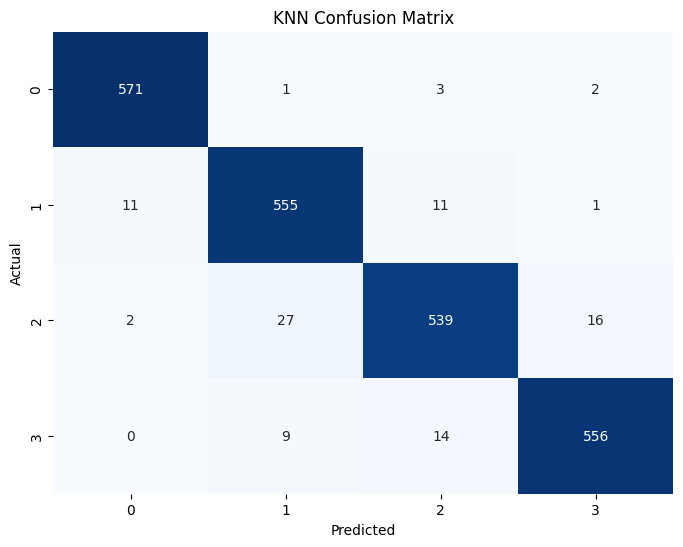

----------------------------------------------------------------------------------------------------

==== Decision Tree Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       577
           1       0.98      0.98      0.98       578
           2       0.97      0.96      0.96       584
           3       0.97      0.98      0.97       579

    accuracy                           0.98      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.98      0.98      2318



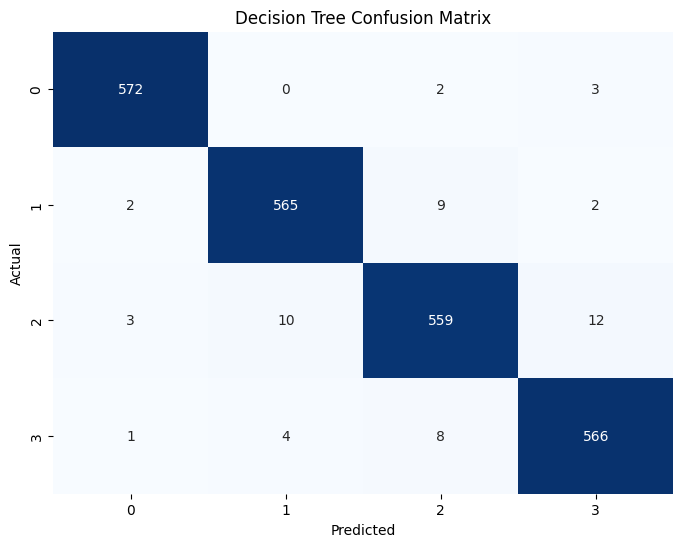

----------------------------------------------------------------------------------------------------

==== Random Forest Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       577
           1       0.98      0.97      0.98       578
           2       0.96      0.98      0.97       584
           3       0.99      0.99      0.99       579

    accuracy                           0.98      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.98      0.98      2318



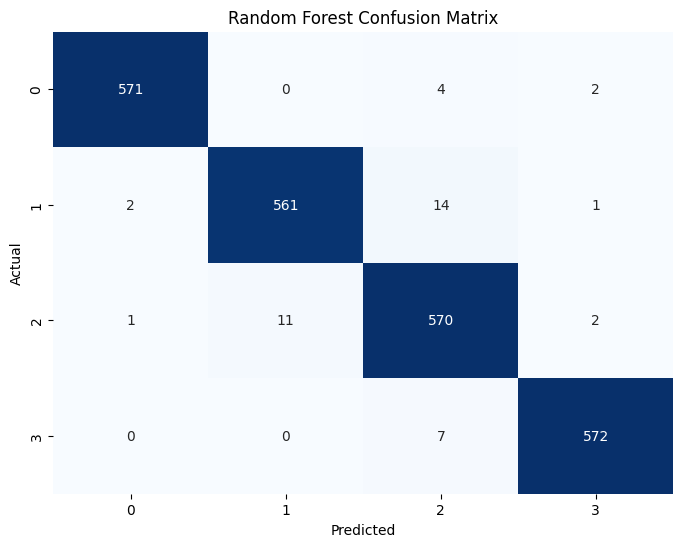

----------------------------------------------------------------------------------------------------



In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test) # Data uji
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"==== {name} Classifier ====")
    print("\nClassification Report:")
    print(report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 100 + "\n")

Ini adalah tahap evaluasi final yang paling penting. Pengujian pada **data uji (*testing set*)** bertujuan untuk mengukur kemampuan generalisasi model pada data yang sepenuhnya baru, yang mensimulasikan performa model di dunia nyata.

#### **Hasil Performa pada Data Uji**

  * **KNN**: Mencapai akurasi **96%**.
  * **Decision Tree**: Mencapai akurasi **98%**.
  * **Random Forest**: Mencapai akurasi **98%**.

-----

### **Analisis Perbandingan dan Kesimpulan Akhir**

1.  **Perbandingan Performa**:

      * **Decision Tree & Random Forest**: Meskipun kedua model ini menunjukkan *overfitting* pada data latih (akurasi 100%), keduanya berhasil melakukan generalisasi dengan sangat baik pada data uji, dengan penurunan akurasi yang minimal menjadi **98%**.
      * **KNN**: Model ini terbukti paling stabil. Dengan akurasi 97% pada data latih dan 96% pada data uji, penurunannya hanya 1%. Ini menunjukkan KNN adalah model yang sangat andal dan tidak *overfit*.

2.  **Pemilihan Model Terbaik**:
    Meskipun KNN sangat stabil, **Random Forest** dan **Decision Tree** secara objektif memberikan akurasi tertinggi pada data yang belum pernah dilihat sebelumnya. Di antara keduanya, **Random Forest Classifier** umumnya dianggap lebih superior karena sifat *ensemble*-nya yang membuatnya lebih robust (andal) terhadap variasi data.

    Oleh karena itu, **Random Forest Classifier direkomendasikan sebagai model terbaik** untuk menyelesaikan masalah klasifikasi cuaca pada proyek ini.

# Kesimpulan Akhir

Proyek ini bertujuan untuk membangun model *machine learning* yang efektif untuk mengklasifikasikan tipe cuaca berdasarkan serangkaian fitur meteorologi tabular. Melalui serangkaian tahapan yang sistematis, mulai dari eksplorasi data, persiapan data, hingga evaluasi model, telah berhasil dikembangkan sebuah model klasifikasi dengan performa yang sangat tinggi.

**Ringkasan Proses dan Temuan:**

1.  **Analisis Data (EDA)**: Tahap eksplorasi berhasil mengidentifikasi karakteristik penting dari *dataset*, termasuk adanya *outliers* pada beberapa fitur numerik, hubungan korelasi antar variabel, dan distribusi kelas target yang awalnya tidak seimbang.

2.  **Persiapan Data**: Berdasarkan temuan dari EDA, dilakukan persiapan data yang cermat. Langkah-langkah krusial yang telah dilakukan meliputi *encoding* variabel kategorikal, penanganan *outliers* dengan metode IQR, penyeimbangan kelas target, dan standarisasi fitur numerik untuk mengoptimalkan performa model.

3.  **Pemodelan dan Evaluasi**: Tiga model klasifikasi—**K-Nearest Neighbors (KNN)**, **Decision Tree**, dan **Random Forest**—diimplementasikan dan dievaluasi secara menyeluruh. Hasil evaluasi menunjukkan bahwa:
    * Model **KNN** sangat stabil, dengan akurasi **96%** pada data uji dan hampir tidak mengalami *overfitting*.
    * Model **Decision Tree** dan **Random Forest** menunjukkan kemampuan generalisasi yang luar biasa dengan akurasi tertinggi mencapai **98%** pada data uji.

**Rekomendasi Model Terbaik:**

Meskipun ketiga model menunjukkan performa yang sangat baik, **Random Forest Classifier direkomendasikan sebagai model terbaik** untuk proyek ini. Alasan utamanya adalah karena model ini berhasil mencapai **akurasi tertinggi (98%)** pada data uji, dan sebagai model *ensemble*, ia secara inheren lebih robust (andal) dan kurang rentan terhadap *overfitting* dibandingkan dengan satu Decision Tree tunggal.

Secara keseluruhan, proyek ini telah berhasil membuktikan bahwa dengan alur kerja *machine learning* yang terstruktur, mulai dari pemahaman data hingga evaluasi, dapat dibangun sebuah solusi klasifikasi cuaca yang sangat akurat dan dapat diandalkan.